In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%load_ext autoreload
%autoreload 2

In [ ]:
x = np.linspace(0,10,1000)

In [ ]:
y1 = np.sin(x)
y2 = 2*np.sin(2*x)
y3 = .5*np.cos(.5*x)
y4 = 3*np.cos(3*x)
y5 = 6*np.sin(6*x)

In [ ]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y4)
plt.plot(x,y3)
plt.plot(x,y5)

plt.plot(x,y1+y2+y3+y4+ y5, lw = 5)



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x,.1*np.ones(1000),y1)
ax.plot(x,.2*np.ones(1000),y2)
ax.plot(x,.3*np.ones(1000),y3)
ax.plot(x,.4*np.ones(1000),y4)
ax.plot(x,.5*np.ones(1000),y5)
ax.plot(x,.2*np.ones(1000),y1+y2+y3+y4+y5,lw = 4, color = 'black')

In [2]:
import pandas as pd

In [ ]:
data = pd.read_csv('May-2012-Metrorail-OD-Table-by-Time-of-Day-and-Day-of-Week .csv')

In [ ]:
data.head(10)

In [ ]:
bike_master = pd.read_csv('201801-capitalbikeshare-tripdata.csv')
bike_master = pd.concat([bike_master,pd.read_csv('201802-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201803-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201804-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201805-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201806-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201807-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201808-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201809-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201810-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201811-capitalbikeshare-tripdata.csv')])
bike_master = pd.concat([bike_master,pd.read_csv('201812-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201901-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201902-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201903-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201904-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201905-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201906-capitalbikeshare-tripdata.csv')])
# bike_master = pd.concat([bike_master,pd.read_csv('201907-capitalbikeshare-tripdata.csv')])



In [ ]:
bike_master['Start date'] = pd.to_datetime(bike_master['Start date'])
bike_master['End date'] = pd.to_datetime(bike_master['End date'])

In [ ]:
bike_master['day_of_trip'] = [item.date() for item in bike_master['Start date']]

In [ ]:
bike_by_day = bike_master.groupby('day_of_trip').count()

In [ ]:
bike_by_day.drop(columns = ['Start date', 'End date', 'Start station number', 'Start station',
                            'End station number', 'End station', 'Bike number', 'Member type'], inplace = True)

In [ ]:
bike_by_day = bike_by_day.rename(columns = {'Duration': 'count'})

In [ ]:
bike_by_day

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.plot(bike_by_day)

In [3]:
import bikes

In [ ]:
test = bikes.data_by_date('2018')

In [ ]:
test.shape

In [ ]:
bike_master.day_of_trip.unique()[:365]

In [ ]:
bike_master.iloc[:365]

In [ ]:
test = test.reset_index()

In [ ]:
test.head()

In [ ]:
test.date_of_trip.value_counts()

In [ ]:
test.loc[test.date_of_trip == '2018-01-04']

In [ ]:
debug = pd.read_csv('201811-capitalbikeshare-tripdata.csv')

In [ ]:
debug.head()

In [ ]:
debug.iloc[-1]['Start date'][6]

In [ ]:
debug.iloc[1000]['Start date'][6]

In [ ]:
debug = pd.read_csv('201811-capitalbikeshare-tripdata.csv')

In [ ]:
debug[-18690:]


In [ ]:
debug[202376:]

In [ ]:
pd.read_csv('201812-capitalbikeshare-tripdata.csv')

In [ ]:
debug.iloc[0:202376]

In [ ]:
data_dict = {}
for year in ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']:
    data_dict[year] = bikes.data_by_date(year)
    

In [ ]:
for year in data_dict:
    print(len(data_dict[year]))

In [ ]:
master = pd.DataFrame()
for year in data_dict:
    print(data_dict[year])
    master = pd.concat([master, data_dict[year]])

In [ ]:
master.to_csv('master.csv')

In [4]:
master = pd.read_csv('master.csv')

In [5]:
master.shape

(3233, 2)

In [10]:
master.set_index('date_of_trip', inplace = True)

KeyError: 'date_of_trip'

In [11]:
master.index = pd.to_datetime(master.index)

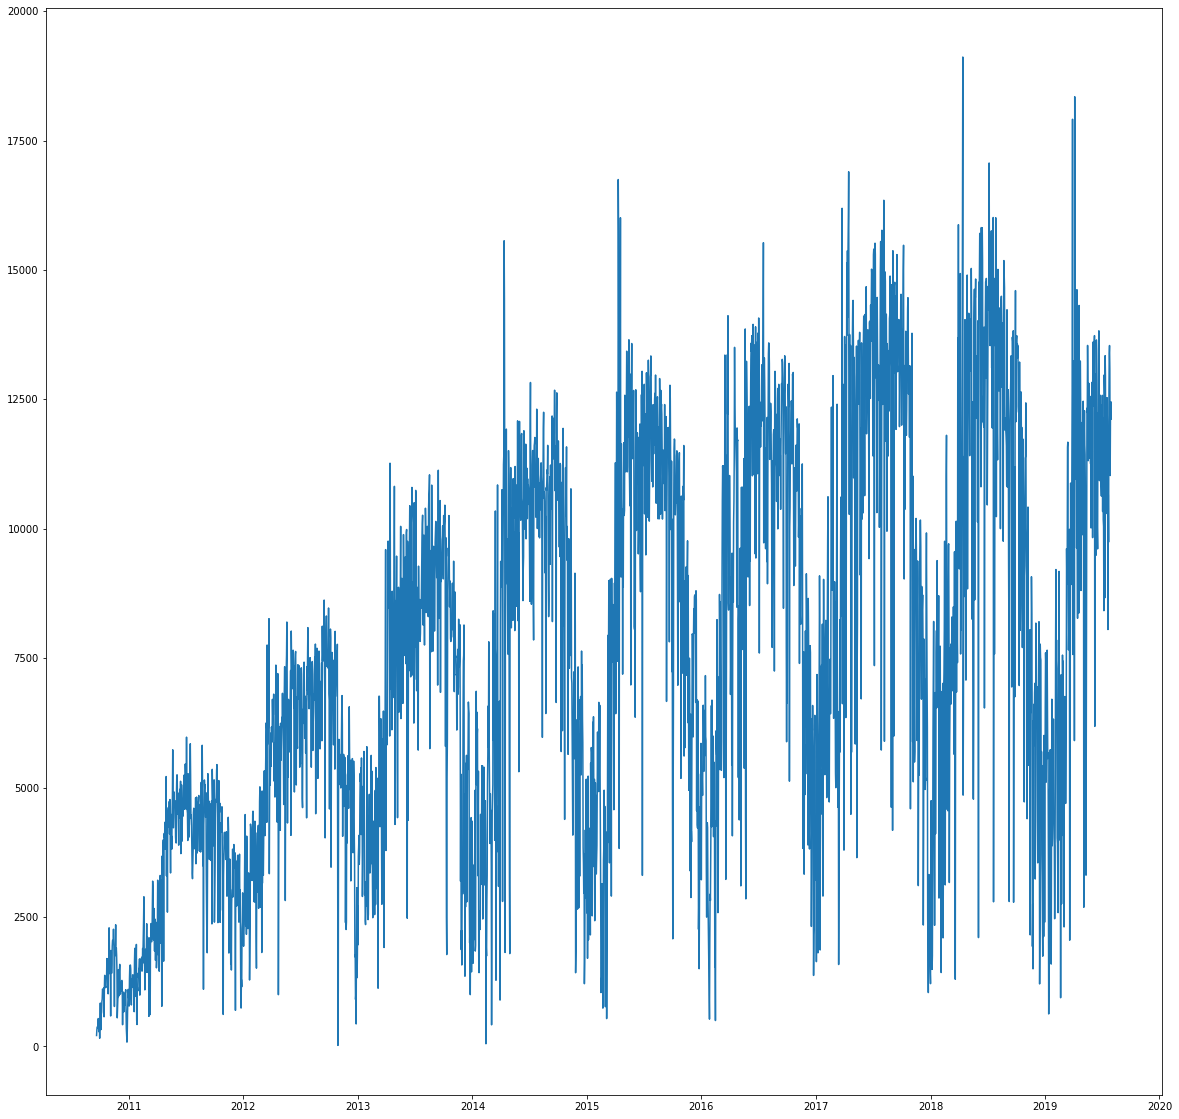

In [109]:
fig = plt.figure(figsize = (20,20))
plt.plot(master)

In [8]:
master.tail()

,count
date_of_trip,
2019-07-27,13079
2019-07-28,11029
2019-07-29,12152
2019-07-30,12455
2019-07-31,12118


In [13]:
master_rolling = master.rolling(100).mean()
master_rolling

,count
date_of_trip,
2010-09-20,NaN
2010-09-21,NaN
2010-09-22,NaN
2010-09-23,NaN
2010-09-24,NaN
2010-09-25,NaN
2010-09-26,NaN
2010-09-27,NaN
2010-09-28,NaN


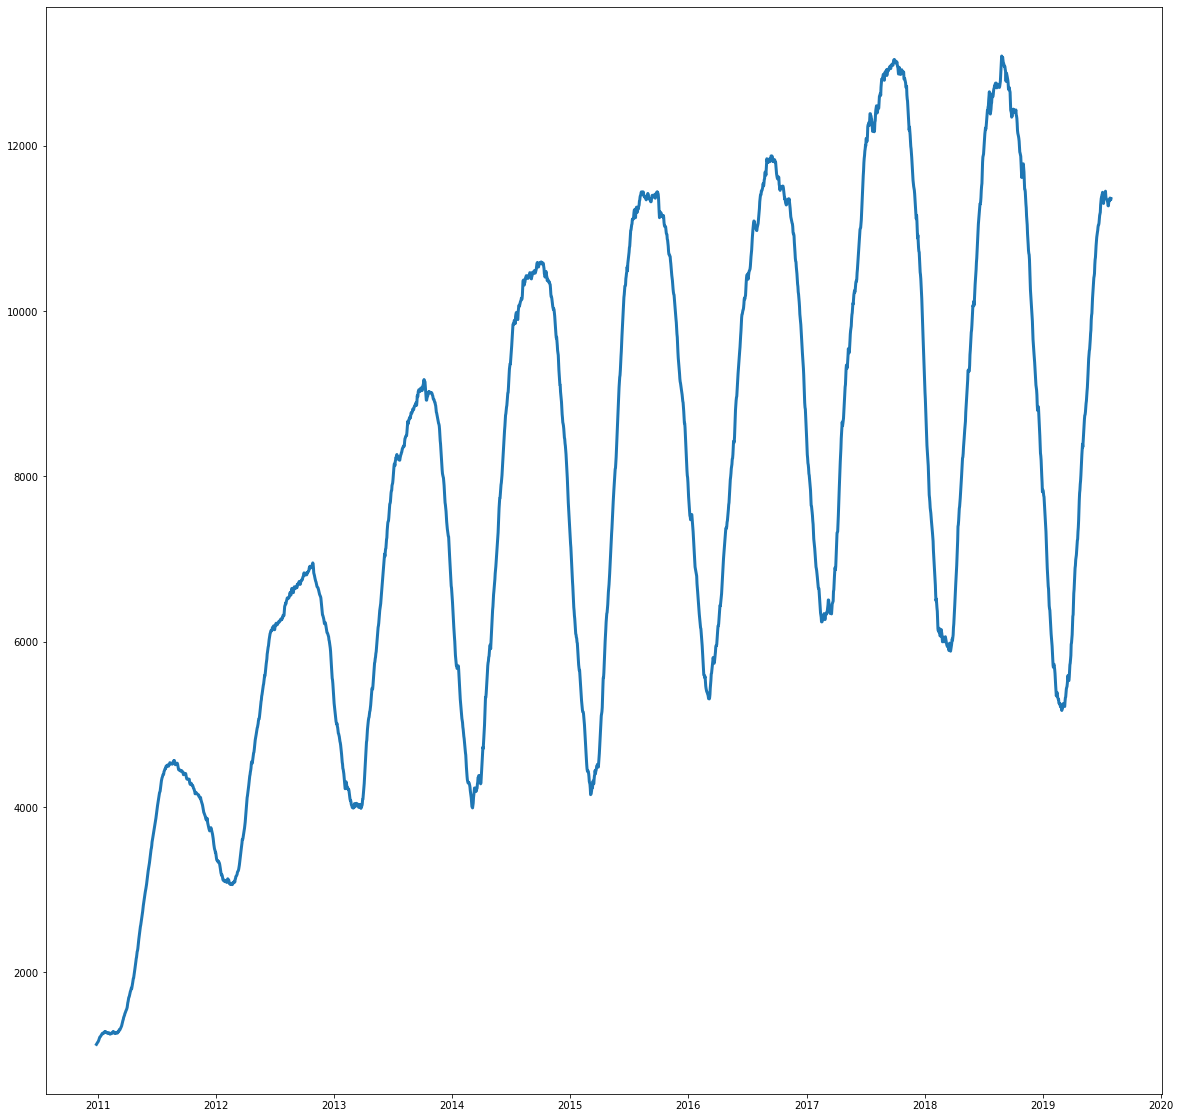

In [14]:
fig = plt.figure(figsize = (20,20))
plt.plot(master_rolling, lw = 3)

In [46]:
master_weekly = master.resample('w').sum()

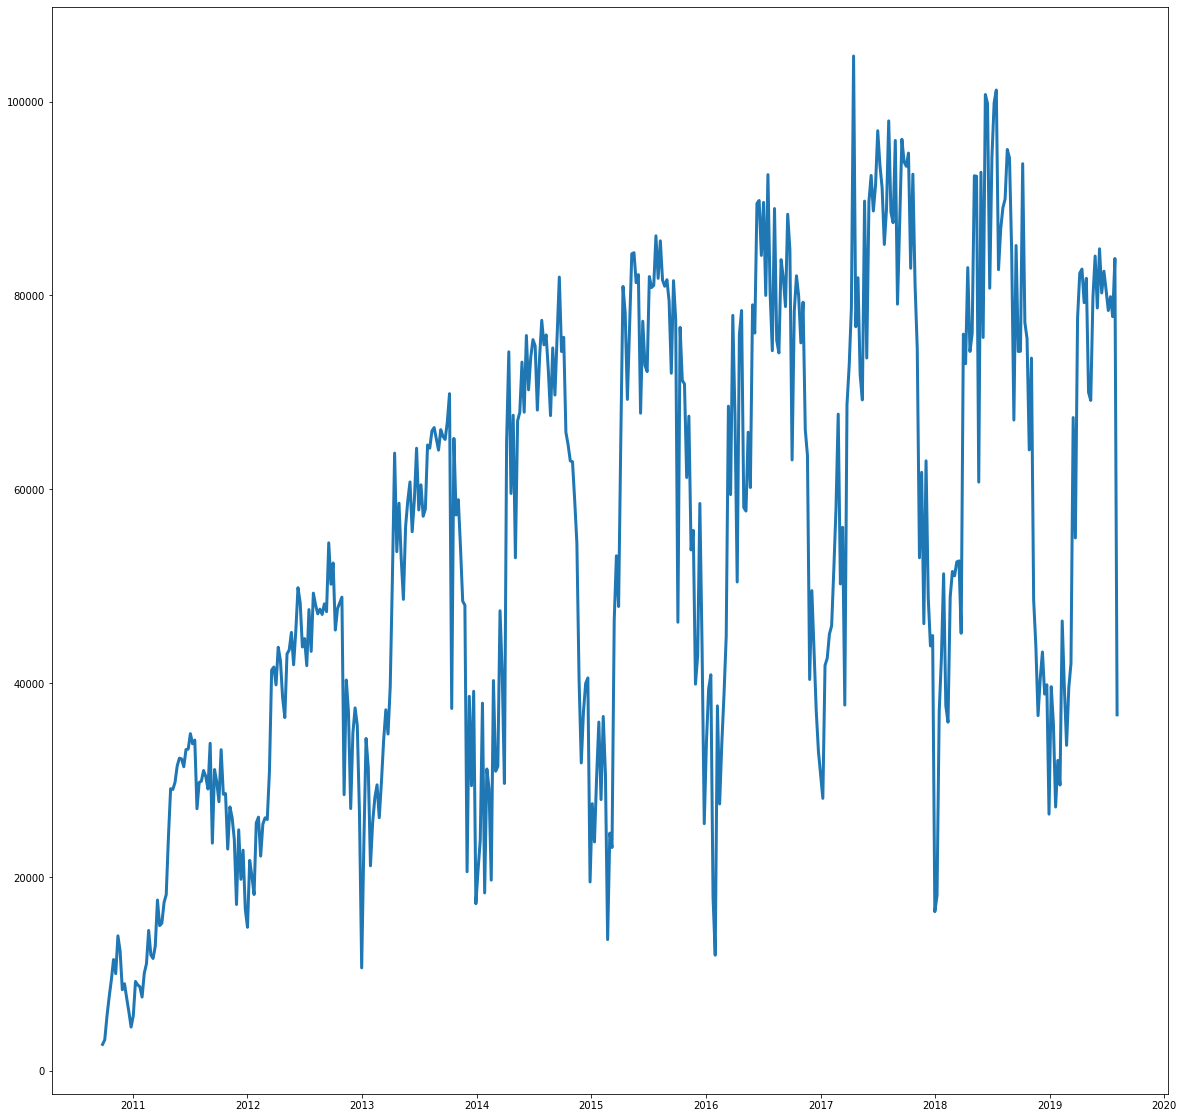

In [47]:
fig = plt.figure(figsize = (20,20))
plt.plot(master_weekly, lw = 3)

In [15]:
master_monthly = master.resample('m').sum()

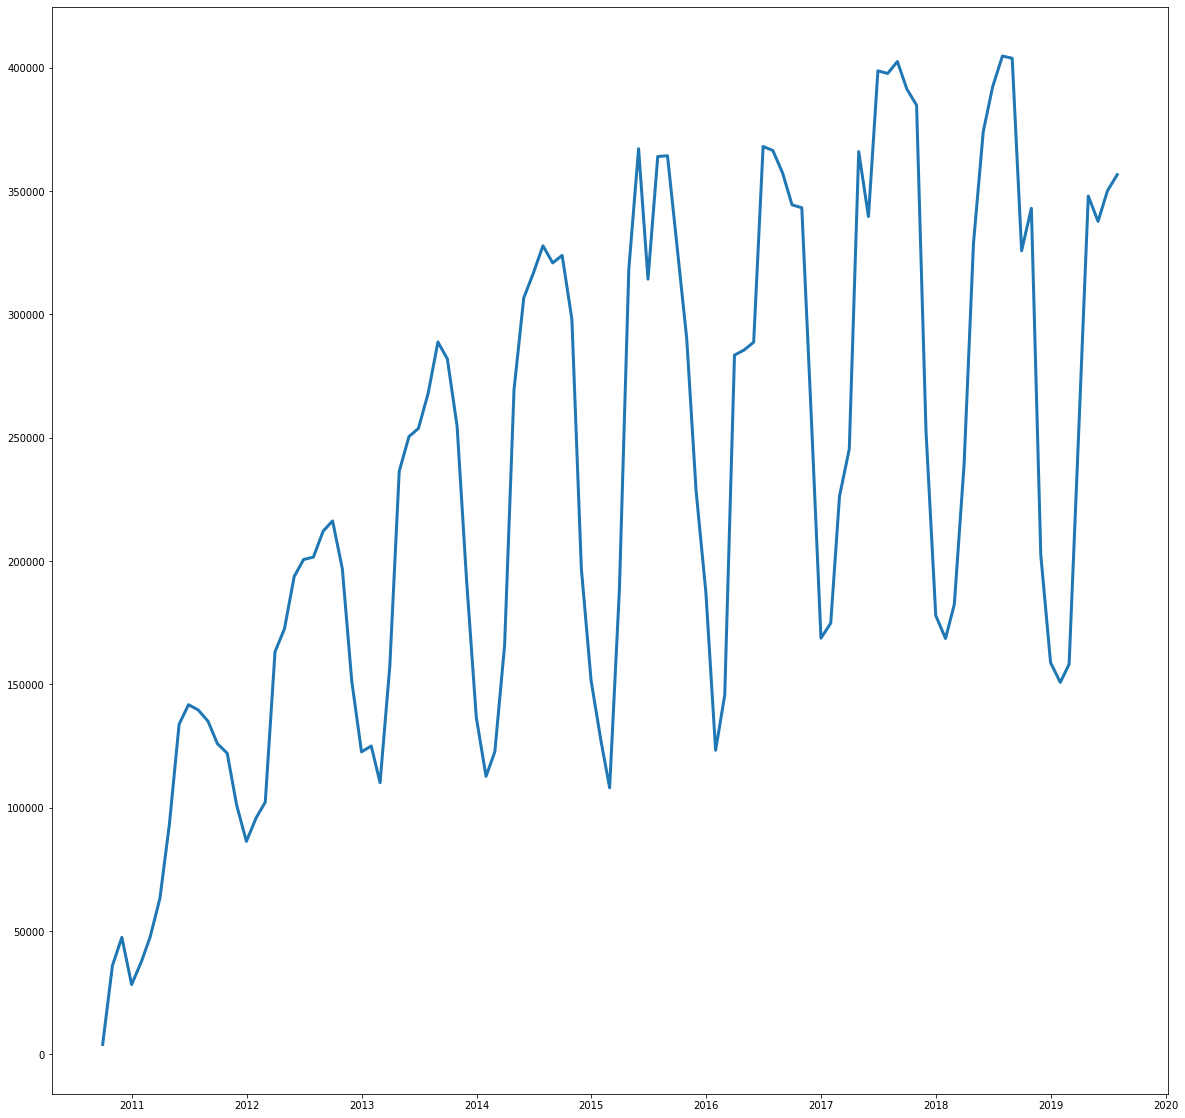

In [16]:
fig = plt.figure(figsize = (20,20))
plt.plot(master_monthly, lw = 3)

<Figure size 432x288 with 0 Axes>

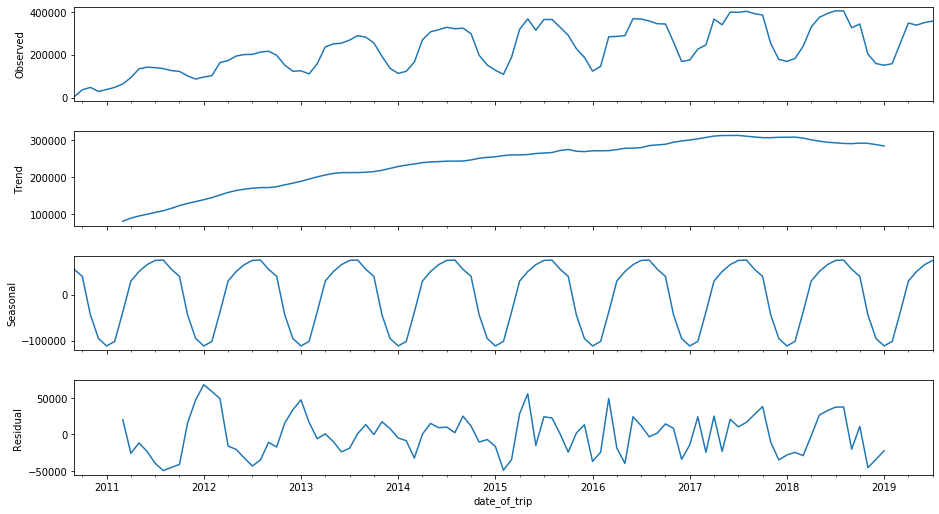

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(master_monthly, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [18]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['count'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


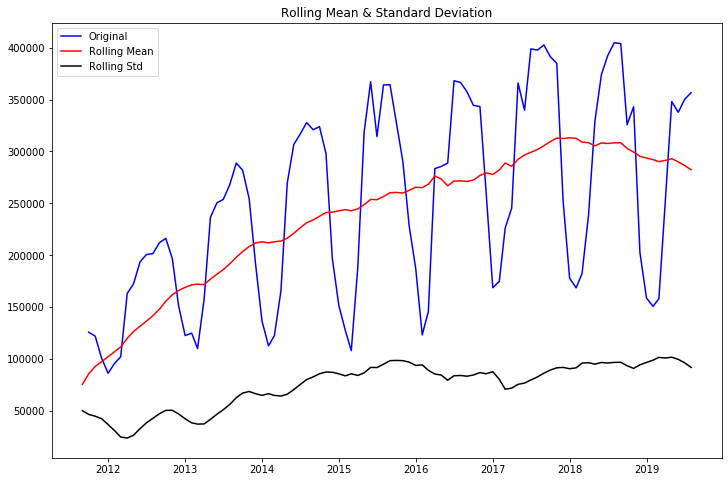

Results of Dickey-Fuller Test:
Test Statistic                 -3.530084
p-value                         0.007247
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [19]:
test_stationarity(master_monthly,12)

In [20]:
master_monthly_log = np.log(master_monthly)

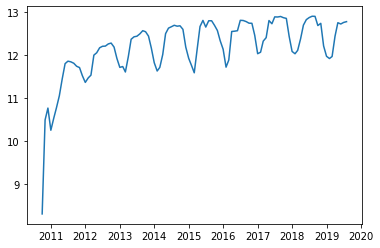

In [21]:
plt.plot(master_monthly_log)

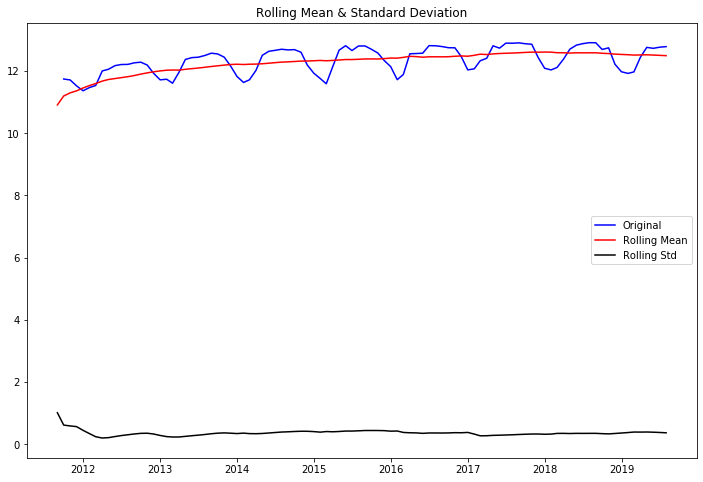

Results of Dickey-Fuller Test:
Test Statistic                 -5.527687
p-value                         0.000002
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [22]:
test_stationarity(master_monthly_log,12)

In [23]:
master_monthly_1st_diff = master_monthly.diff() 

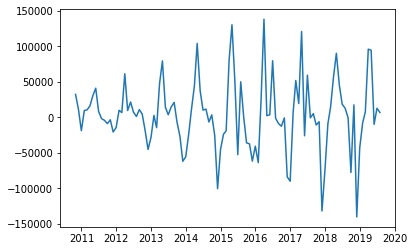

In [24]:
plt.plot(master_monthly_1st_diff)

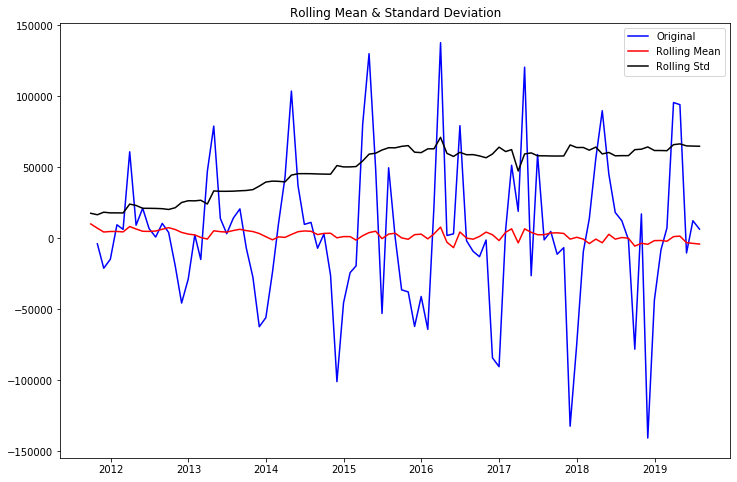

Results of Dickey-Fuller Test:
Test Statistic                 -2.685876
p-value                         0.076514
#Lags Used                     12.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [25]:
test_stationarity(master_monthly_1st_diff.dropna(inplace = False),12)

In [26]:
master_monthly_seasonal_shift = master_monthly.shift(12) 

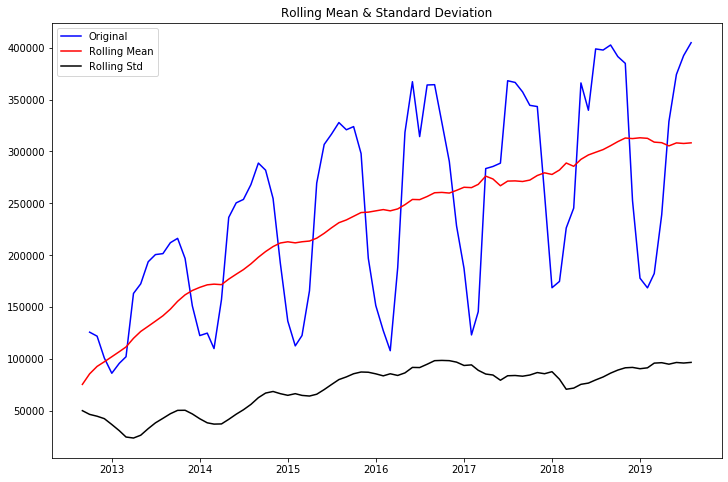

Results of Dickey-Fuller Test:
Test Statistic                 -4.705251
p-value                         0.000082
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [27]:
test_stationarity(master_monthly_seasonal_shift.dropna(inplace = False),12)

In [28]:
master_monthly_seasonal_of_diff = master_monthly_1st_diff.shift(12)

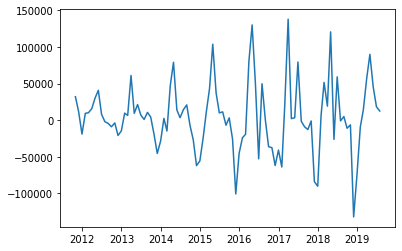

In [29]:
plt.plot(master_monthly_seasonal_of_diff)

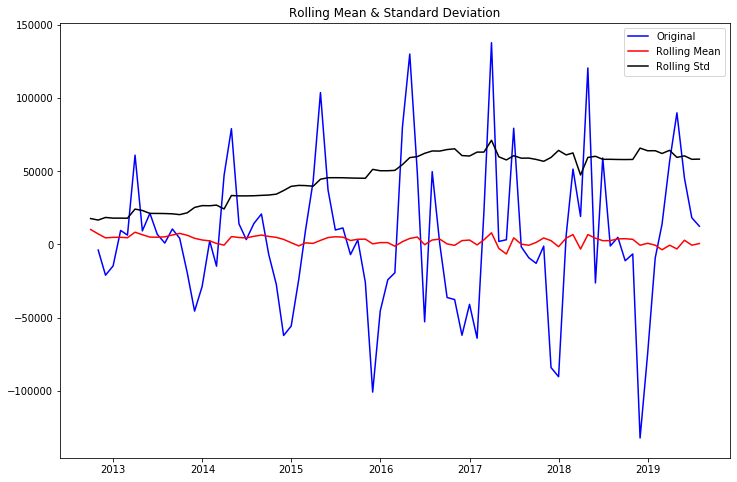

Results of Dickey-Fuller Test:
Test Statistic                 -3.302592
p-value                         0.014763
#Lags Used                     12.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


In [30]:
test_stationarity(master_monthly_seasonal_of_diff.dropna(inplace = False),12)

In [31]:
master_monthly_log_diff = master_monthly_log.diff()

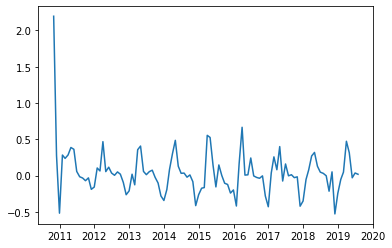

In [32]:
plt.plot(master_monthly_log_diff)

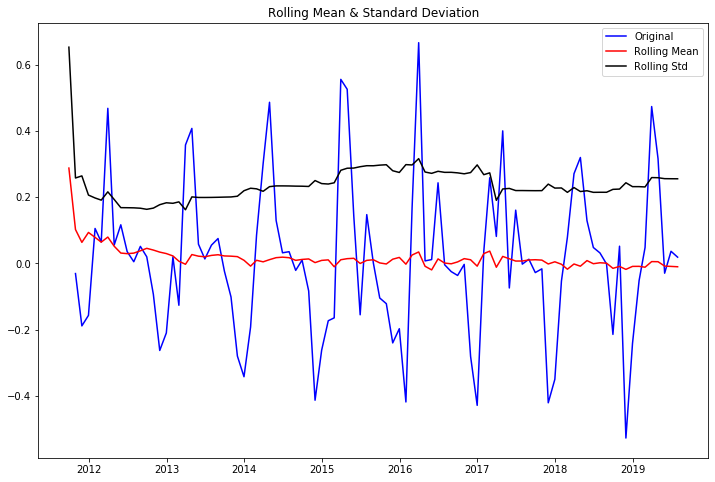

Results of Dickey-Fuller Test:
Test Statistic                 -3.685683
p-value                         0.004319
#Lags Used                     13.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


In [33]:
test_stationarity(master_monthly_log_diff.dropna(inplace = False),12)

In [34]:
master_monthly_seasonal_of_log_diff = master_monthly_log_diff.shift(12)

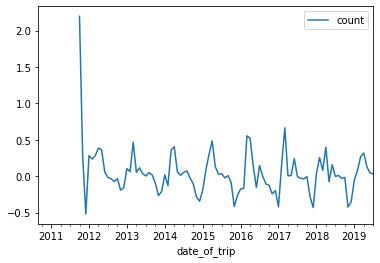

In [35]:
master_monthly_seasonal_of_log_diff.plot()

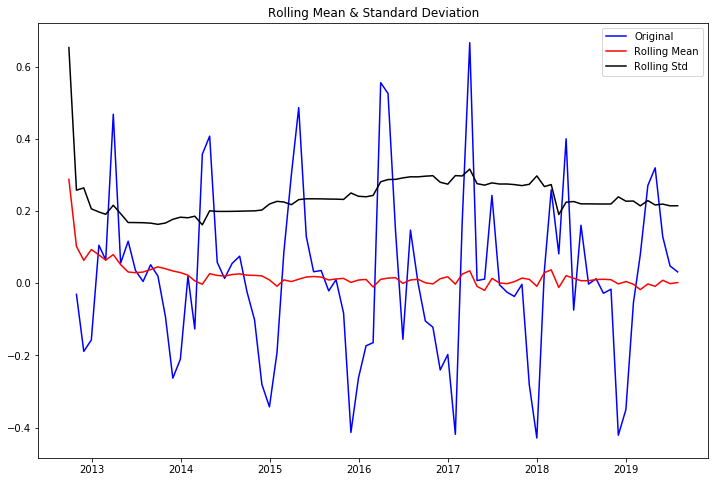

Results of Dickey-Fuller Test:
Test Statistic                 -3.960577
p-value                         0.001632
#Lags Used                     12.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


In [36]:
test_stationarity(master_monthly_seasonal_of_log_diff.dropna(inplace = False),12)

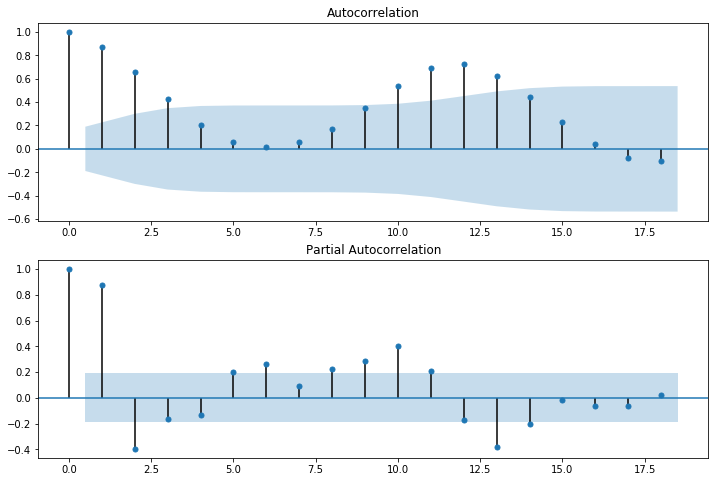

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(master_monthly, lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(master_monthly, lags=18, ax=ax2)

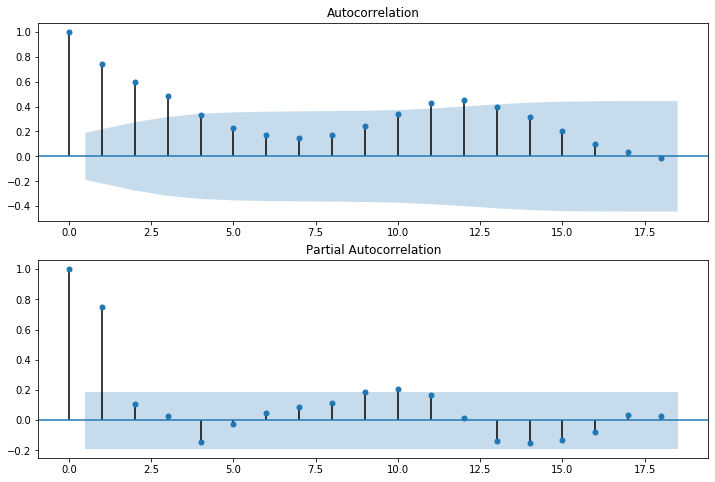

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(master_monthly_log, lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(master_monthly_log, lags=18, ax=ax2)

In [48]:
import pyramid as pyr

In [55]:
pip install pmdarima

     |████████████████████████████████| 460kB 3.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
from pmdarima import auto_arima

In [66]:
len(master)

3233

In [127]:
type(master_weekly['count'])

pandas.core.series.Series

In [148]:
stepwise_model = auto_arima(master_weekly['count'], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=52,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True).fit(master_weekly['count'])
print(stepwise_model.aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 12); AIC=10576.367, BIC=10588.780, Fit time=0.161 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=10684.681, BIC=10692.957, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=9846.914, BIC=9863.464, Fit time=0.507 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=10401.803, BIC=10418.354, Fit time=0.165 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=9845.252, BIC=9857.665, Fit time=0.047 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 12); AIC=9846.809, BIC=9863.360, Fit time=0.170 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=9848.678, BIC=9869.367, Fit time=0.613 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=9794.921, BIC=9811.472, Fit time=0.086 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=9794.406, BIC=9815.095, Fit time=0.124 seconds
Fit ARIMA: order=(3, 0

In [149]:
stepwise_model.predict()

array([54522.19823741, 52792.47361616, 51578.748691  , 52300.45228607,
       52207.34585358, 52218.18374864, 52275.53574092, 52301.25920649,
       52332.25052155, 52362.74058893])

In [133]:
predictions

,count
2019-08-04,54522.198237
2019-08-11,52792.473616
2019-08-18,51578.748691
2019-08-25,52300.452286
2019-09-01,52207.345854
2019-09-08,52218.183749
2019-09-15,52275.535741
2019-09-22,52301.259206
2019-09-29,52332.250522
2019-10-06,52362.740589


In [134]:
master

,count
date_of_trip,
2010-09-20,212
2010-09-21,324
2010-09-22,377
2010-09-23,373
2010-09-24,362
2010-09-25,539
2010-09-26,537
2010-09-27,286
2010-09-28,411


In [135]:
master_test =pd.concat([master_weekly,predictions])

In [145]:
mod = sm.tsa.statespace.SARIMAX(master_monthly['count'], trend='n', order=(1,0,1), seasonal_order=(0,1,1,12))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                  107
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1118.223
Date:                            Sat, 07 Sep 2019   AIC                           2244.446
Time:                                    20:31:04   BIC                           2254.662
Sample:                                09-30-2010   HQIC                          2248.574
                                     - 07-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9697      0.020     48.699      0.000       0.931       1.009
ma.L1         -0.7878      0.076    -10.330      0.000      -0.937      -0.638
ma.S.L12      -0.1705      0.111     -1.535      0.125      -0.388       0.047
sigma2      1.119e+09   2.53e-11   4.42e+19      0.000    1.12e+09    1.12e+09
===================================================================================
Ljung-Box (Q):                       73.02   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.00   Prob(JB):                         0.78
Heteroskedasticity (H):               1.39   Skew:                            -0.11
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.58e+36. Standard errors may be unstable.
"""

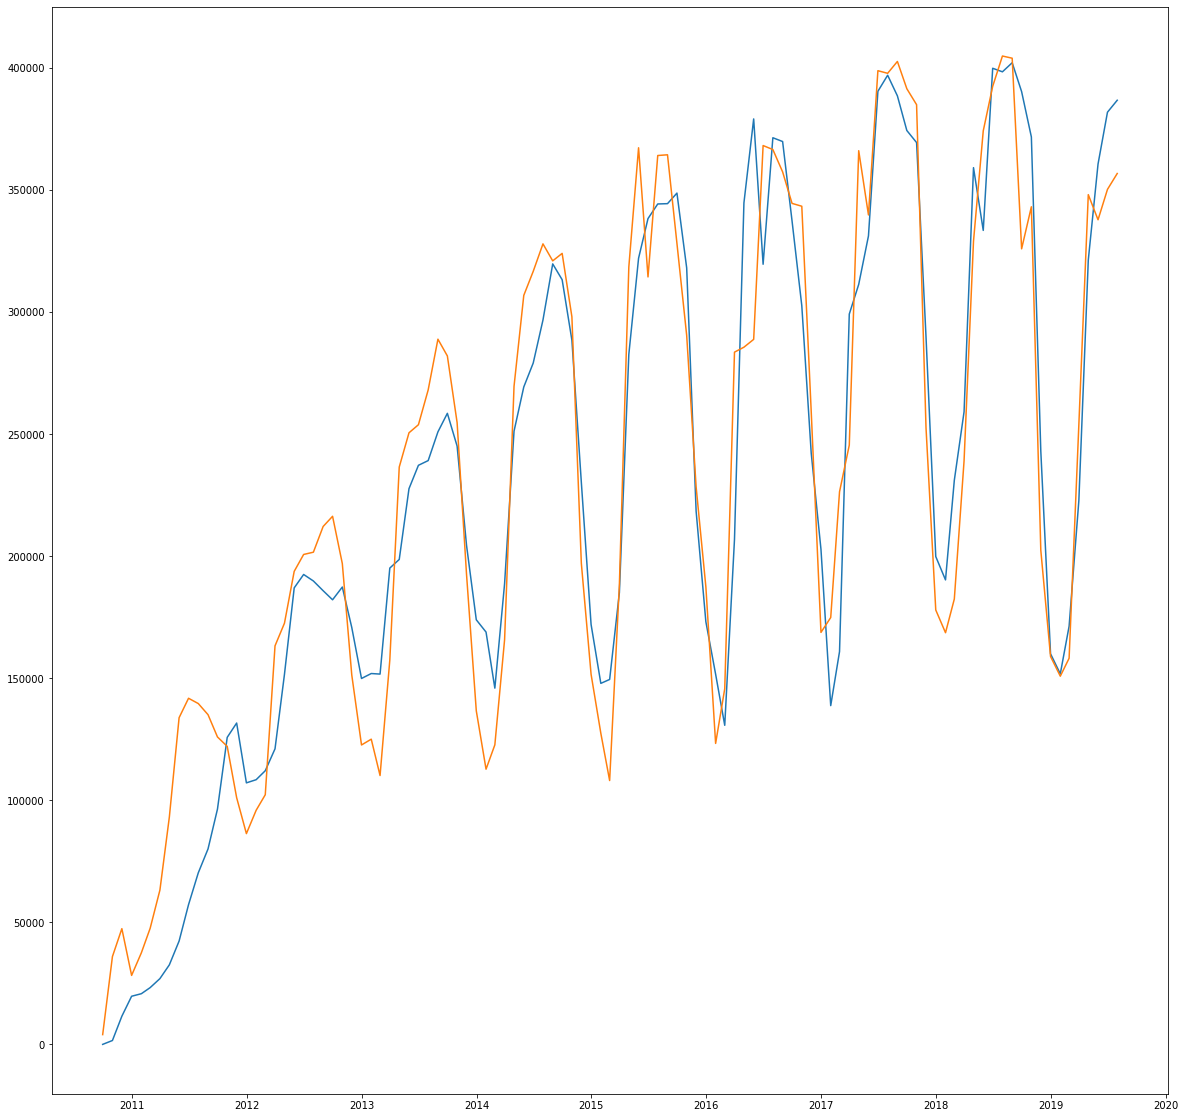

In [146]:
fig = plt.figure(figsize = (20,20))
plt.plot(res.predict())
plt.plot(master_monthly)

In [141]:
master_weekly.tail()

,count
date_of_trip,
2019-07-07,78441
2019-07-14,79866
2019-07-21,77807
2019-07-28,83806
2019-08-04,36725
